<a href="https://colab.research.google.com/github/JinLeeGG/AI_Project_Preparation/blob/main/2.%20Web%20Development%20(providing%20LLM%20service)/03.%20MongoDB/4_MongoDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://ryuzyproject.tistory.com/55

# 1. pymongo 설치
pymongo는 파이썬에서 MongoDB와 상호작용하기 위해 사용하는 공식 Python 클라이언트 라이브러리입니다. 이 라이브러리를 사용하면 MongoDB에 데이터를 쉽게 삽입, 조회, 수정, 삭제할 수 있습니다.

In [1]:
! pip install pymongo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 16.9 MB/s eta 0:00:00


# 2. 몽고DB 서버와의 연결

In [2]:
from pymongo import MongoClient

In [4]:
url = '' #MongoDB connection string
client = MongoClient(url) # make new client
print(client) # shows responses (it connected)

MongoClient(host=['ac-0ykfnjn-shard-00-01.arbx7wl.mongodb.net:27017', 'ac-0ykfnjn-shard-00-02.arbx7wl.mongodb.net:27017', 'ac-0ykfnjn-shard-00-00.arbx7wl.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, retrywrites=True, w='majority', appname='Cluster0', authsource='admin', replicaset='atlas-apbh5q-shard-0', tls=True)


In [5]:
# 데이터베이스 선택
database = client['aiproject'] # client에 접속하고자하는 db를 지정

# 컬렉션 선택
collection = database['users'] # db에 있는 collection 선택

# 3. 데이터 추가

In [6]:
# 데이터 한개 추가
user_insert = {'userid':'apple', 'name':'김사과', 'age':20} # 데이터 형식 생성
result = collection.insert_one(user_insert) # collection 안에 데이터 넣기
print(f'입력된 데이터 id: {result.inserted_id}') # 입력된 번호가 나온다 (object id)

입력된 데이터 id: 6836e4fcd7a2607c6789a512


### 추가된걸 확인:
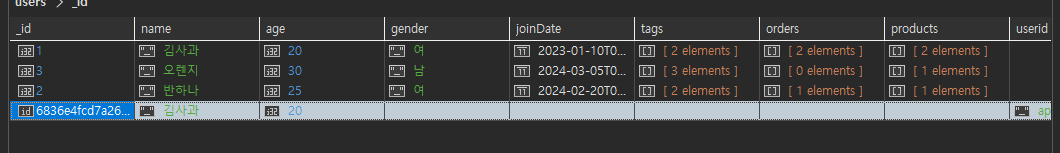

In [10]:
# 데이터 복수 추가
users_insert = [
    {'userid':'banana', 'name':'반하나', 'age':25},
    {'userid':'orange', 'name':'오렌지', 'age':30},
    {'userid':'melon', 'name':'이메론', 'age':28}
]

result = collection.insert_many(users_insert) # 여러개를 한꺼번에 넣기
print(f'입력된 데이터 id: {result.inserted_ids}') # inserted_ids, 복수를 보여준다.

입력된 데이터 id: [ObjectId('6836e698d7a2607c6789a513'), ObjectId('6836e698d7a2607c6789a514'), ObjectId('6836e698d7a2607c6789a515')]


# 4. 데이터 조회하기

In [11]:
user_find = {'userid':'apple'} # 찾을 내용 저장
result = collection.find_one(user_find) # 찾기
print(f'데이터: {result}')

데이터: {'_id': ObjectId('6836e4fcd7a2607c6789a512'), 'userid': 'apple', 'name': '김사과', 'age': 20}


In [13]:
result = collection.find({}) # 조건이 없을때는 전체를 다 가져온다.
result # 객체로 담겨져있다. (cursor object - 제일 첫번째꺼를 가르킨다). 반복문을 이용하면 커서를 계속 이동한다. (iterater)

for data in result:
    print(data)   # 데이터 전체를 하나씩 다 찍어준다.

{'_id': 1, 'name': '김사과', 'age': 20, 'gender': '여', 'joinDate': datetime.datetime(2023, 1, 10, 0, 0), 'tags': ['몽고DB', '집계'], 'orders': [{'orderId': 101, 'amount': 200000, 'orderDate': datetime.datetime(2024, 1, 15, 0, 0)}, {'orderId': 102, 'amount': 450000, 'orderDate': datetime.datetime(2024, 3, 22, 0, 0)}], 'products': [{'productId': 'p1', 'category': '전자제품', 'price': 500000, 'rating': 4.8}, {'productId': 'p2', 'category': '의류', 'price': 50000, 'rating': 4.2}]}
{'_id': 3, 'name': '오렌지', 'age': 30, 'gender': '남', 'joinDate': datetime.datetime(2024, 3, 5, 0, 0), 'tags': ['몽고DB', '집계', '데이터베이스'], 'orders': [], 'products': [{'productId': 'p4', 'category': '의류', 'price': 80000, 'rating': 4.1}]}
{'_id': 2, 'name': '반하나', 'age': 25, 'gender': '여', 'joinDate': datetime.datetime(2024, 2, 20, 0, 0), 'tags': ['데이터베이스', '몽고DB'], 'orders': [{'orderId': 103, 'amount': 300000, 'orderDate': datetime.datetime(2024, 2, 18, 0, 0)}], 'products': [{'productId': 'p3', 'category': '전자제품', 'price': 120000,

# 5. 데이터 수정

In [15]:
user_update = {'userid':'apple'} # userid가 apple 인걸 타깃
new_value = {'$set': {'age':30}} # set을 이용해서 age를 30으로 업데이트를 시킨다.
result = collection.update_one(user_update, new_value) # update --> new_value로 바꾼다.
print(result)

user_find = {"userid":"apple"}
result = collection.find_one(user_find)
print(f'데이터: {result}')

UpdateResult({'n': 1, 'electionId': ObjectId('7fffffff00000000000000ba'), 'opTime': {'ts': Timestamp(1748429562, 3), 't': 186}, 'nModified': 0, 'ok': 1.0, '$clusterTime': {'clusterTime': Timestamp(1748429562, 3), 'signature': {'hash': b'9\x92\r\xde\xffE2\xab\xbd\xd6\xe4\xda\x9b<\x17s\xd4I\x1e\xa5', 'keyId': 7452261432474730504}}, 'operationTime': Timestamp(1748429562, 3), 'updatedExisting': True}, acknowledged=True)
데이터: {'_id': ObjectId('6836e4fcd7a2607c6789a512'), 'userid': 'apple', 'name': '김사과', 'age': 30}


# 6. 데이터 삭제

In [16]:
user_delete = {'userid':'apple'}
result = collection.delete_one(user_delete)
print(result)

DeleteResult({'n': 1, 'electionId': ObjectId('7fffffff00000000000000ba'), 'opTime': {'ts': Timestamp(1748429592, 922), 't': 186}, 'ok': 1.0, '$clusterTime': {'clusterTime': Timestamp(1748429592, 922), 'signature': {'hash': b'\x19W\x025\xaf7\xb9cM\x06L\xbd\xab\x0f\xc9\xeatm\xab%', 'keyId': 7452261432474730504}}, 'operationTime': Timestamp(1748429592, 922)}, acknowledged=True)
